In [12]:
import matplotlib.pyplot as plt
import numpy as np
import sep
from astropy.io import fits
from photutils.aperture import EllipticalAperture
from photutils.isophote import EllipseGeometry
from photutils.isophote import Ellipse
from photutils.isophote import (Ellipse, EllipseGeometry, build_ellipse_model)
from photutils.centroids import centroid_quadratic
from photutils.profiles import RadialProfile
from astropy.utils.data import get_pkg_data_filename
from numpy import *

path_galaxy = "Bicocca-Tele.data/ngc_6946_for_29th_Sep_2025/LIGHT"

hdu1 = fits.open(get_pkg_data_filename(path_galaxy + '/master_galaxy.fits'))[0] # reproj_2025-09-29_18-12-19_sci_NGC6946_G_exp300.00_SUM.fits  
data = hdu1.data


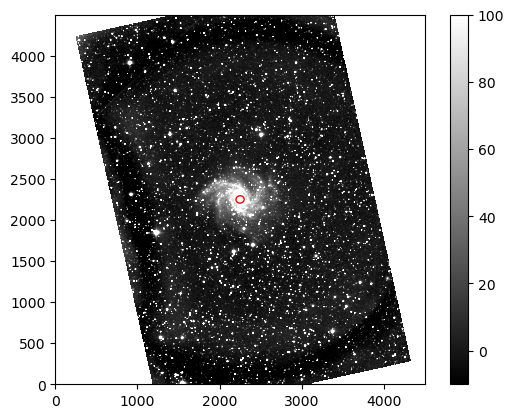

sma intens intens_err ellipticity ... ndata nflag niter stop_code
                                  ...                            
--- ------ ---------- ----------- ... ----- ----- ----- ---------


In [13]:
position_x , position_y = 2250 ,  2250  # These are for G SUM IMAGE

position = (position_x,position_y)

geometry = EllipseGeometry(x0= position_x, y0= position_y, sma=50, eps=0.1,
                           pa=10.0 * np.pi / 180.0)
aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,
                          geometry.sma * (1 - geometry.eps), geometry.pa)


plt.imshow(data, cmap= 'grey', origin='lower', clim = (-10,100)) #[500:2500 ,1500:3500] , clim = (1,1000)
plt.colorbar() # max = 100000 , min = -1000
aper.plot(color='red')
plt.show()

ellipse = Ellipse(data, geometry)
isolist = ellipse.fit_image()
print(isolist.to_table())


In [ ]:
model_image = build_ellipse_model(data.shape, isolist)
residual = data - model_image

fig, ax1 = plt.subplots(figsize=(14, 5))
ax1.imshow(data, cmap= 'coolwarm', origin='lower', clim = (-10,100))
ax1.set_title('Data')

smas = np.linspace(0, 600, 5)
for sma in smas:
    iso = isolist.get_closest(sma)
    x, y, = iso.sampled_coordinates()
    ax1.plot(x, y, color='white')


ValueError: isolist must not be empty

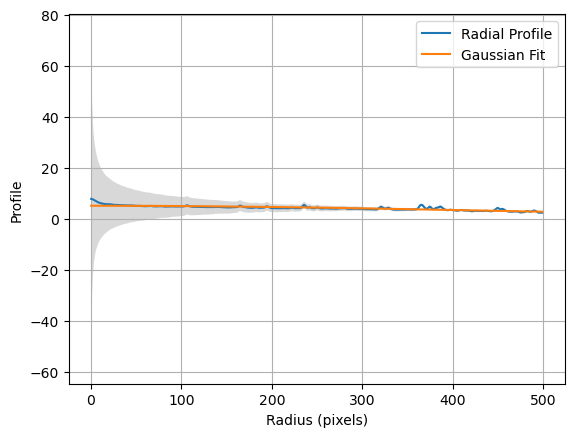

In [ ]:
data = data.astype(data.dtype.newbyteorder('='))
bkg = sep.Background(data)
rms = bkg.rms()
error = np.zeros_like(data) + bkg  # So if data is, for example, a 1D or 2D array, error becomes an array of identical size, but filled with zeros.

edge_radii = np.arange(500)
rp = RadialProfile(data, position, edge_radii, error= error, mask=None )

rp.profile = np.log(rp.profile)
fig, ax = plt.subplots()
rp.plot(ax=ax, label='Radial Profile')
rp.plot_error(ax=ax)
ax.plot(rp.radius, rp.gaussian_profile, label='Gaussian Fit')
ax.legend()
plt.grid()


